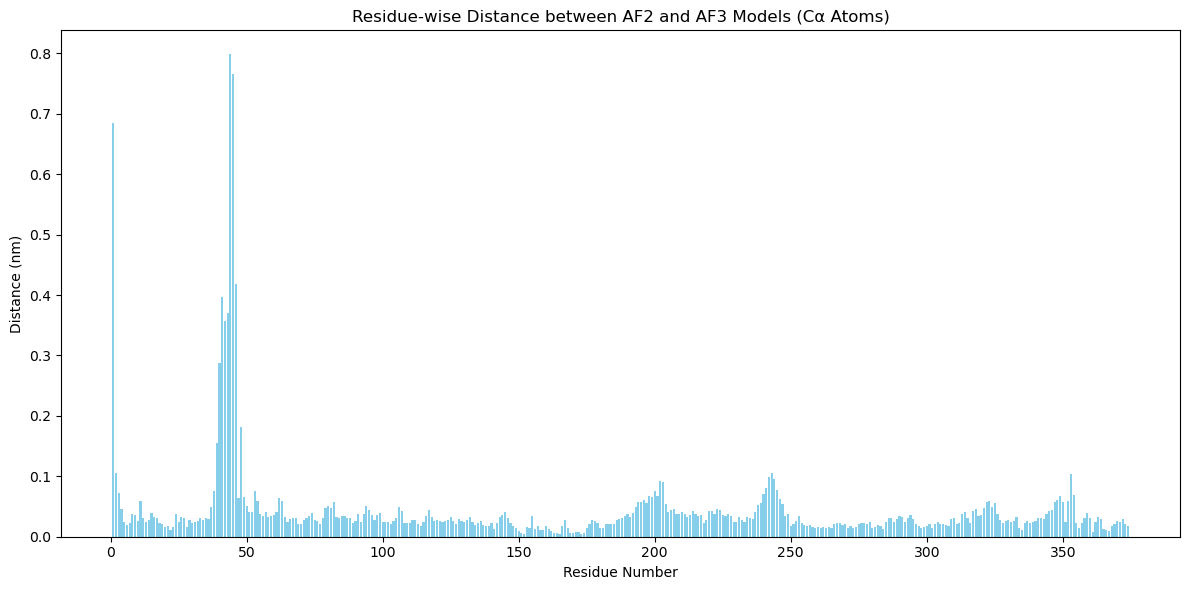

In [4]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load AF2 and AF3 structures
af2 = md.load('/home/jh9412/HiJihye/comp-lab-class-2024/Week7/part2/input/af2.pdb')
af3 = md.load('/home/jh9412/HiJihye/comp-lab-class-2024/Week7/part2/input/af3_1.pdb')

# Select only Cα atoms for both structures
ca_atoms_af2 = af2.topology.select('name CA')
ca_atoms_af3 = af3.topology.select('name CA')

# Superpose AF3 onto AF2 using only Cα atoms
af3_aligned = af3.superpose(af2, atom_indices=ca_atoms_af3, ref_atom_indices=ca_atoms_af2)

# Compute residue-wise distance between AF2 and aligned AF3
distances = np.sqrt(np.sum((af2.xyz[0, ca_atoms_af2] - af3_aligned.xyz[0, ca_atoms_af3])**2, axis=1))

# Generate residue IDs
residue_ids = [residue.resSeq for residue in af2.topology.residues if residue.is_protein]

# Plot the differences as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(residue_ids, distances, color='skyblue')
plt.xlabel('Residue Number')
plt.ylabel('Distance (nm)')
plt.title('Residue-wise Distance between AF2 and AF3 Models (Cα Atoms)')
plt.tight_layout()
plt.savefig('/home/jh9412/HiJihye/comp-lab-class-2024/Week7/part2/figure/Residue-wise Distance_graph.png', dpi=300)
plt.show()
